In [2]:
# 1. Dataset Overview

import pandas as pd

# Load the dataset (make sure the file is in the same folder)
df = pd.read_csv("Global_Music_Streaming_Listener_Preferences.csv")

# Show first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Show last 5 rows
print("\nLast 5 rows of the dataset:")
display(df.tail())

# Shape of dataset (Rows, Columns)
print("\nShape of the dataset (Rows, Columns):")
print(df.shape)

# List all column names
print("\nColumn Names:")
print(df.columns.tolist())

# Data types of each column
print("\nData Types of Each Column:")
print(df.dtypes)

# Count of missing values in each column
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Count of unique values in each column
print("\nUnique Values per Column:")
print(df.nunique())


First 5 rows of the dataset:


,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,34.0,Japan,Tidal,Reggae,295.0,138,Adele,Free,Afternoon,47.42,16.74
1,U1001,24.0,Germany,Deezer,Country,86.0,388,Ed Sheeran,Premium,Night,12.06,69.25
2,U1002,49.0,Germany,Deezer,Pop,363.0,368,Post Malone,Premium,Afternoon,47.19,67.38
3,U1003,55.0,Australia,YouTube,Reggae,348.0,349,Dua Lipa,Premium,Morning,31.27,76.51
4,U1004,13.0,Germany,Amazon Music,Reggae,30.0,328,Adele,Free,Night,30.68,43.41



Last 5 rows of the dataset:


,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
4995,U5995,60.0,UK,Deezer,Country,348.0,81,Post Malone,Premium,Morning,49.23,22.36
4996,U5996,38.0,Australia,Deezer,Hip-Hop,225.0,218,BTS,Premium,Night,17.08,58.23
4997,U5997,27.0,Brazil,Amazon Music,Metal,568.0,277,Taylor Swift,Premium,Night,69.39,51.71
4998,U5998,58.0,Canada,Amazon Music,EDM,523.0,492,Bad Bunny,Premium,Night,43.44,24.53
4999,U5999,30.0,South Korea,YouTube,Rock,-451.0,145,Adele,Premium,Night,15.45,NaN



Shape of the dataset (Rows, Columns):
(5000, 12)

Column Names:
['User_ID', 'Age', 'Country', 'Streaming Platform', 'Top Genre', 'Minutes Streamed Per Day', 'Number of Songs Liked', 'Most Played Artist', 'Subscription Type', 'Listening Time (Morning/Afternoon/Night)', 'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']

Data Types of Each Column:
User_ID                                      object
Age                                         float64
Country                                      object
Streaming Platform                           object
Top Genre                                    object
Minutes Streamed Per Day                    float64
Number of Songs Liked                         int64
Most Played Artist                           object
Subscription Type                            object
Listening Time (Morning/Afternoon/Night)     object
Discover Weekly Engagement (%)               object
Repeat Song Rate (%)                        float64
dtype: object

Missi

In [3]:
# 2. Data Quality Checks

# Check missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())

# Detect duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Detect negative values in numeric columns (if any)
print("\nChecking for invalid negative values in numeric columns:")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    invalid_rows = df[df[col] < 0]
    if len(invalid_rows) > 0:
        print(f"\nInvalid values found in '{col}':")
        display(invalid_rows)
    else:
        print(f"No invalid negative values in '{col}'")

# Check inconsistent formatting in object/string columns
print("\nChecking text columns for formatting inconsistencies:")
text_cols = df.select_dtypes(include='object').columns
for col in text_cols:
    print(f"\nUnique values in column '{col}':")
    print(df[col].unique()[:10])  # show only first 10 unique values


Missing Values in Each Column:
User_ID                                     0
Age                                         3
Country                                     1
Streaming Platform                          4
Top Genre                                   4
Minutes Streamed Per Day                    1
Number of Songs Liked                       0
Most Played Artist                          2
Subscription Type                           2
Listening Time (Morning/Afternoon/Night)    2
Discover Weekly Engagement (%)              2
Repeat Song Rate (%)                        3
dtype: int64

Number of duplicate rows: 0

Checking for invalid negative values in numeric columns:
No invalid negative values in 'Age'

Invalid values found in 'Minutes Streamed Per Day':


,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
579,U1579,43.0,Germany,Spotify,NaN,-240.0,201,Bad Bunny,Free,Night,29.33,55.88
599,U1599,57.0,USA,YouTube,Country,-47.0,133,Billie Eilish,Premium,Afternoon,78.87,38.50
4980,U5980,38.0,Australia,Apple Music,Jazz,-350.0,409,Ed Sheeran,Premium,Morning,68.65,52.32
4999,U5999,30.0,South Korea,YouTube,Rock,-451.0,145,Adele,Premium,Night,15.45,NaN


No invalid negative values in 'Number of Songs Liked'
No invalid negative values in 'Repeat Song Rate (%)'

Checking text columns for formatting inconsistencies:

Unique values in column 'User_ID':
['U1000' 'U1001' 'U1002' 'U1003' 'U1004' 'U1005' 'U1006' 'U1007' 'U1008'
 'U1009']

Unique values in column 'Country':
['Japan' 'Germany' 'Australia' 'South Korea' 'UK' 'Brazil' 'Canada'
 'India' 'USA' 'France']

Unique values in column 'Streaming Platform':
['Tidal' 'Deezer' 'YouTube' 'Amazon Music' 'Spotify' 'Apple Music' nan]

Unique values in column 'Top Genre':
['Reggae' 'Country' 'Pop' 'EDM' 'Classical' 'Metal' 'Rock' 'Hip-Hop' nan
 'R&B']

Unique values in column 'Most Played Artist':
['Adele' 'Ed Sheeran' 'Post Malone' 'Dua Lipa' 'The Weeknd'
 'Billie Eilish' 'BTS' 'Taylor Swift' 'Drake' 'Bad Bunny']

Unique values in column 'Subscription Type':
['Free' 'Premium' nan]

Unique values in column 'Listening Time (Morning/Afternoon/Night)':
['Afternoon' 'Night' 'Morning' nan]

Unique valu

In [4]:
# 3. Data Cleaning

# Standardize text formatting in object columns
text_cols = df.select_dtypes(include='object').columns
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

# Remove duplicate rows
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.")

#  Handle missing values

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Categorical: fill with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values handled successfully.")

# Verify corrections
print("\nSummary after Cleaning:")
print(df.isnull().sum())

# Preview cleaned data
print("\nCleaned Data Sample:")
display(df.head())


Removed 0 duplicate rows.
Missing values handled successfully.

Summary after Cleaning:
User_ID                                     0
Age                                         0
Country                                     0
Streaming Platform                          0
Top Genre                                   0
Minutes Streamed Per Day                    0
Number of Songs Liked                       0
Most Played Artist                          0
Subscription Type                           0
Listening Time (Morning/Afternoon/Night)    0
Discover Weekly Engagement (%)              0
Repeat Song Rate (%)                        0
dtype: int64

Cleaned Data Sample:


/tmp/ipython-input-1182477587.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,34.0,Japan,Tidal,Reggae,295.0,138,Adele,Free,Afternoon,47.42,16.74
1,U1001,24.0,Germany,Deezer,Country,86.0,388,Ed Sheeran,Premium,Night,12.06,69.25
2,U1002,49.0,Germany,Deezer,Pop,363.0,368,Post Malone,Premium,Afternoon,47.19,67.38
3,U1003,55.0,Australia,Youtube,Reggae,348.0,349,Dua Lipa,Premium,Morning,31.27,76.51
4,U1004,13.0,Germany,Amazon Music,Reggae,30.0,328,Adele,Free,Night,30.68,43.41


In [5]:
# 4. Descriptive Statistics

import numpy as np

print("SUMMARY STATISTICS")
display(df.describe())

# Mean, Median, Mode
print("\nMeasures of Central Tendency")
print("Mean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", df.mode().iloc[0])

# Variance & Standard Deviation
print("\n Variability Measures")
print("Variance:\n", df.var(numeric_only=True))
print("\nStandard Deviation:\n", df.std(numeric_only=True))

# Skewness & Kurtosis
print("\n Distribution Shape")
print("Skewness:\n", df.skew(numeric_only=True))
print("\nKurtosis:\n", df.kurtosis(numeric_only=True))

# Value Counts for Categorical Columns
print("\n Categorical Value Counts ")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head())


SUMMARY STATISTICS


,Age,Minutes Streamed Per Day,Number of Songs Liked,Repeat Song Rate (%)
count,5000.000000,5000.000000,5000.00000,5000.000000
mean,36.663398,308.814363,253.51720,42.396382
std,13.763439,172.802661,146.36928,21.428254
min,13.000000,-451.000000,1.00000,5.000000
25%,25.000000,160.750000,126.00000,24.235000
50%,37.000000,316.000000,254.00000,41.995000
75%,49.000000,457.250000,382.00000,60.725000
max,60.000000,600.000000,500.00000,79.990000



Measures of Central Tendency
Mean:
 Age                          36.663398
Minutes Streamed Per Day    308.814363
Number of Songs Liked       253.517200
Repeat Song Rate (%)         42.396382
dtype: float64

Median:
 Age                          37.000
Minutes Streamed Per Day    316.000
Number of Songs Liked       254.000
Repeat Song Rate (%)         41.995
dtype: float64

Mode:
 User_ID                                            U1000
Age                                                 32.0
Country                                        Australia
Streaming Platform                          Amazon Music
Top Genre                                           Jazz
Minutes Streamed Per Day                           152.0
Number of Songs Liked                              320.0
Most Played Artist                             Bad Bunny
Subscription Type                                Premium
Listening Time (Morning/Afternoon/Night)           Night
Discover Weekly Engagement (%)               

In [6]:
# 5. Data Transformation & Encoding

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Separate numerical and categorical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns

print("Numerical Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))

# SCALING

# Min-Max Scaling (Normalization: scales data 0 to 1)
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[num_cols] = minmax_scaler.fit_transform(df_minmax[num_cols])

print("\nMin-Max Scaled Numerical Columns (0 to 1 range):")
display(df_minmax.head())

# Standardization (mean=0, std=1)
std_scaler = StandardScaler()
df_standard = df.copy()
df_standard[num_cols] = std_scaler.fit_transform(df_standard[num_cols])

print("\nStandard Scaled Numerical Columns (Z-score normalization):")
display(df_standard.head())

#ENCODING

# Label Encoding
df_label = df.copy()
label_enc = LabelEncoder()
for col in cat_cols:
    df_label[col] = label_enc.fit_transform(df_label[col])

print("\nLabel Encoded Dataset:")
display(df_label.head())

# One-Hot Encoding
df_onehot = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\nOne-Hot Encoded Dataset:")
display(df_onehot.head())


Numerical Columns: ['Age', 'Minutes Streamed Per Day', 'Number of Songs Liked', 'Repeat Song Rate (%)']
Categorical Columns: ['User_ID', 'Country', 'Streaming Platform', 'Top Genre', 'Most Played Artist', 'Subscription Type', 'Listening Time (Morning/Afternoon/Night)', 'Discover Weekly Engagement (%)']

Min-Max Scaled Numerical Columns (0 to 1 range):


,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,0.446809,Japan,Tidal,Reggae,0.709800,0.274549,Adele,Free,Afternoon,47.42,0.156554
1,U1001,0.234043,Germany,Deezer,Country,0.510942,0.775551,Ed Sheeran,Premium,Night,12.06,0.856781
2,U1002,0.765957,Germany,Deezer,Pop,0.774500,0.735471,Post Malone,Premium,Afternoon,47.19,0.831844
3,U1003,0.893617,Australia,Youtube,Reggae,0.760228,0.697395,Dua Lipa,Premium,Morning,31.27,0.953594
4,U1004,0.000000,Germany,Amazon Music,Reggae,0.457659,0.655311,Adele,Free,Night,30.68,0.512202



Standard Scaled Numerical Columns (Z-score normalization):


,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,-0.193532,Japan,Tidal,Reggae,-0.079951,-0.789296,Adele,Free,Afternoon,47.42,-1.197435
1,U1001,-0.920167,Germany,Deezer,Country,-1.289544,0.918883,Ed Sheeran,Premium,Night,12.06,1.253313
2,U1002,0.896421,Germany,Deezer,Pop,0.313601,0.782229,Post Malone,Premium,Afternoon,47.19,1.166036
3,U1003,1.332402,Australia,Youtube,Reggae,0.226788,0.652407,Dua Lipa,Premium,Morning,31.27,1.592152
4,U1004,-1.719466,Germany,Amazon Music,Reggae,-1.613646,0.508920,Adele,Free,Night,30.68,0.047308



Label Encoded Dataset:


,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,0,34.0,6,5,9,295.0,138,0,0,0,1704,16.74
1,1,24.0,4,2,1,86.0,388,6,2,3,100,69.25
2,2,49.0,4,2,7,363.0,368,8,2,0,1692,67.38
3,3,55.0,0,6,9,348.0,349,5,2,1,960,76.51
4,4,13.0,4,0,9,30.0,328,0,0,3,934,43.41



One-Hot Encoded Dataset:


,Age,Minutes Streamed Per Day,Number of Songs Liked,Repeat Song Rate (%),User_ID_U1001,User_ID_U1002,User_ID_U1003,User_ID_U1004,User_ID_U1005,User_ID_U1006,...,Discover Weekly Engagement (%)_89.82,Discover Weekly Engagement (%)_89.83,Discover Weekly Engagement (%)_89.86,Discover Weekly Engagement (%)_89.88,Discover Weekly Engagement (%)_89.89,Discover Weekly Engagement (%)_89.93,Discover Weekly Engagement (%)_89.96,Discover Weekly Engagement (%)_89.97,Discover Weekly Engagement (%)_89.99,Discover Weekly Engagement (%)_Nan
0,34.0,295.0,138,16.74,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,24.0,86.0,388,69.25,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,49.0,363.0,368,67.38,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,55.0,348.0,349,76.51,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13.0,30.0,328,43.41,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


Number of outliers in each column:
Age                         0
Minutes Streamed Per Day    2
Number of Songs Liked       0
Repeat Song Rate (%)        0
dtype: int64

Shape before removing outliers: (5000, 12)
Shape after removing outliers (IQR): (4998, 12)
Shape after removing Z-Score outliers: (4997, 12)


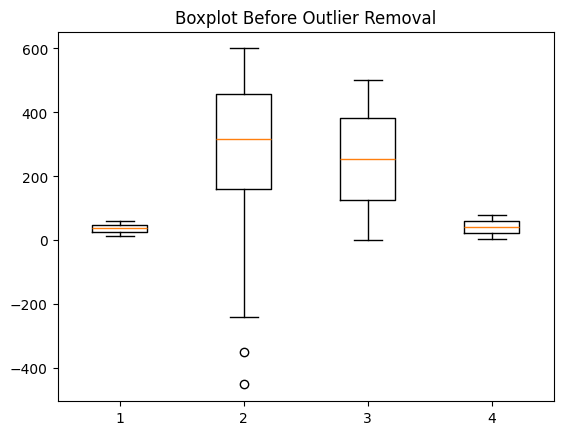

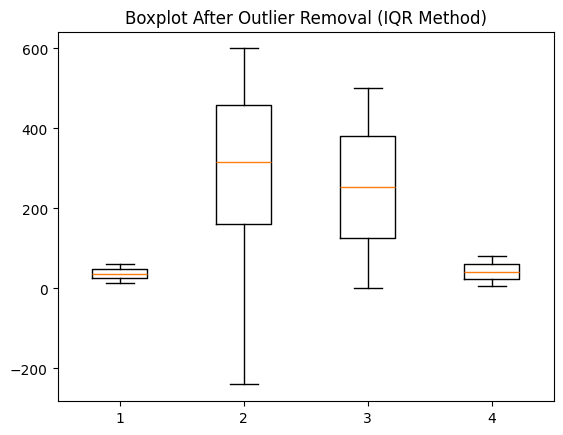

In [7]:
# 6. Outlier Detection & Treatment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select only numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 1. IQR METHOD
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))

print("Number of outliers in each column:")
print(outliers.sum())

# Remove outliers (corrected)
df_clean = df[~outliers.any(axis=1)]
print("\nShape before removing outliers:", df.shape)
print("Shape after removing outliers (IQR):", df_clean.shape)

#2. Z-SCORE METHOD
z = (df[num_cols] - df[num_cols].mean()) / df[num_cols].std()
df_z_clean = df[(np.abs(z) < 3).all(axis=1)]
print("Shape after removing Z-Score outliers:", df_z_clean.shape)

#3. BOXPLOTS (Before & After)
# Before
plt.figure()
plt.boxplot(df[num_cols].values)
plt.title("Boxplot Before Outlier Removal")
plt.show()

# After (IQR cleaned)
plt.figure()
plt.boxplot(df_clean[num_cols].values)
plt.title("Boxplot After Outlier Removal (IQR Method)")
plt.show()


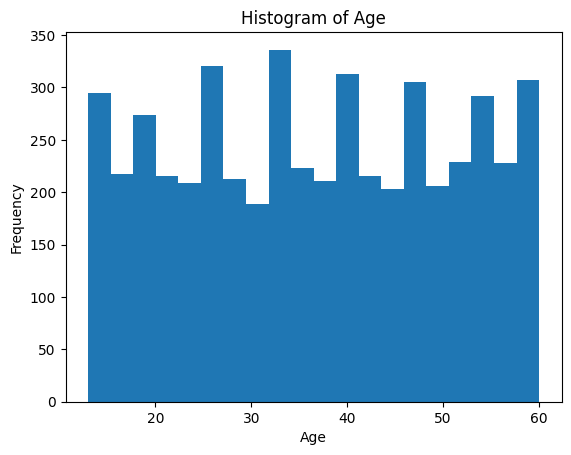

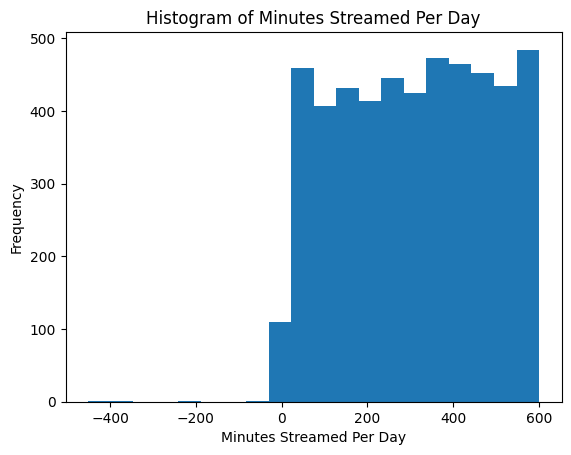

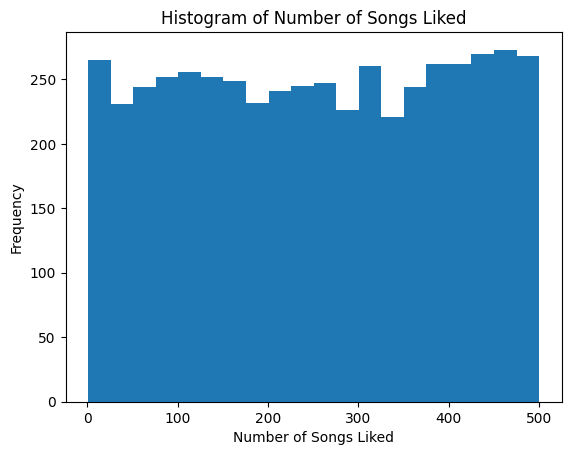

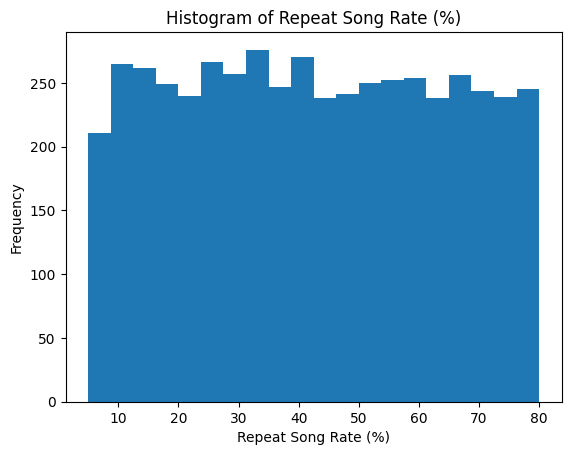

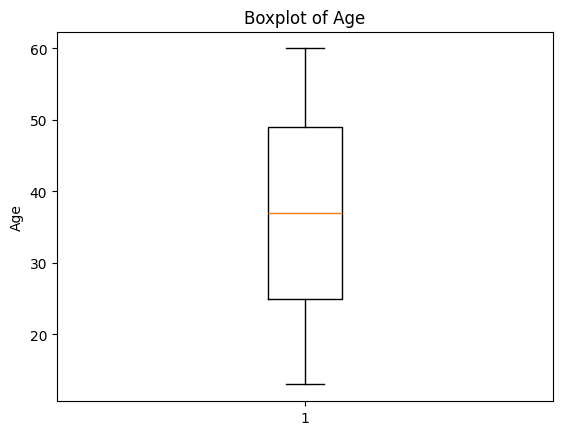

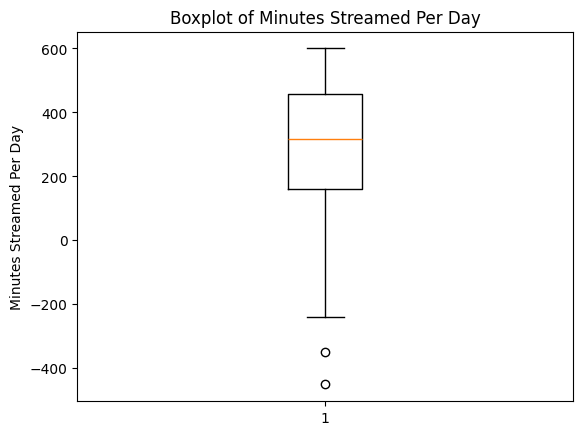

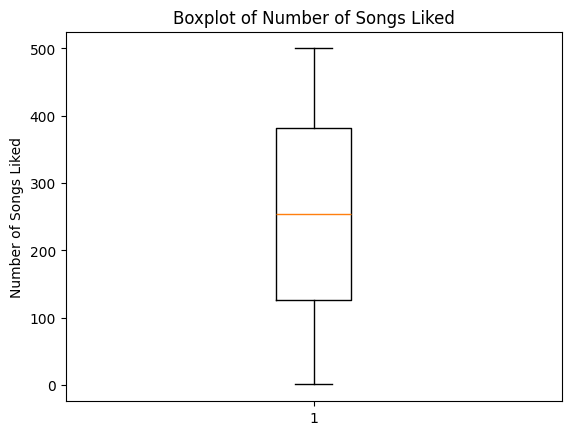

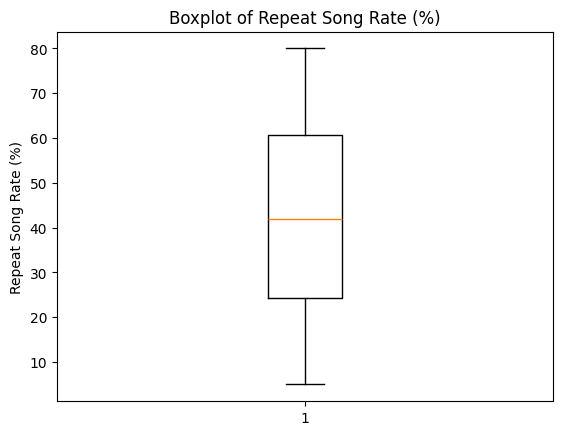

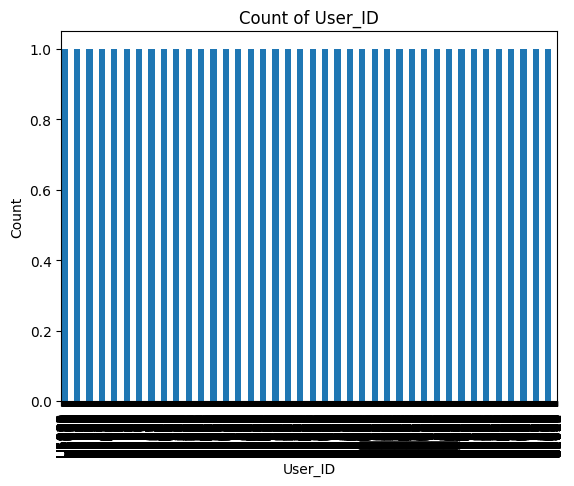

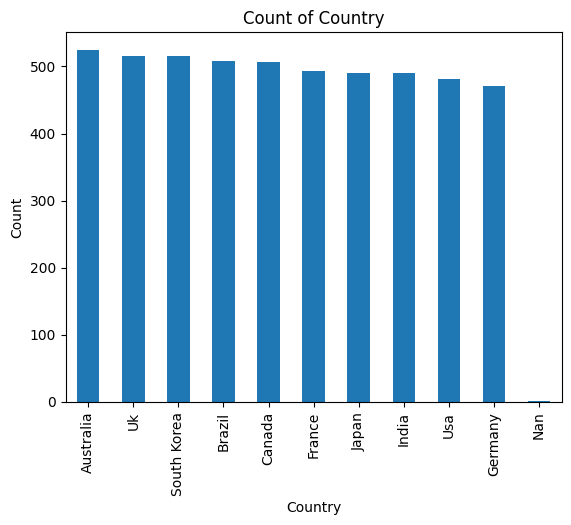

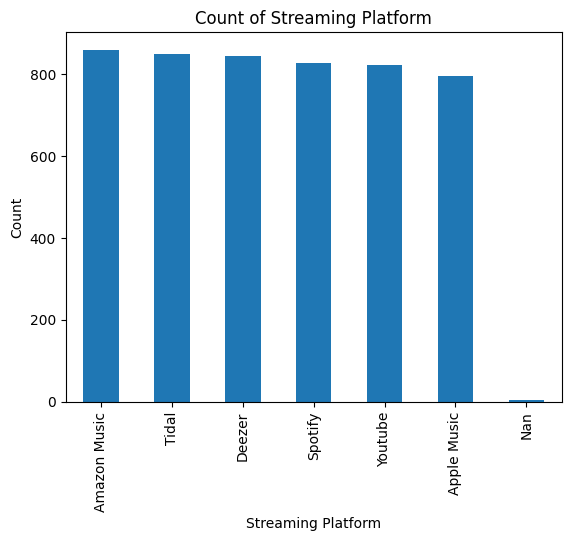

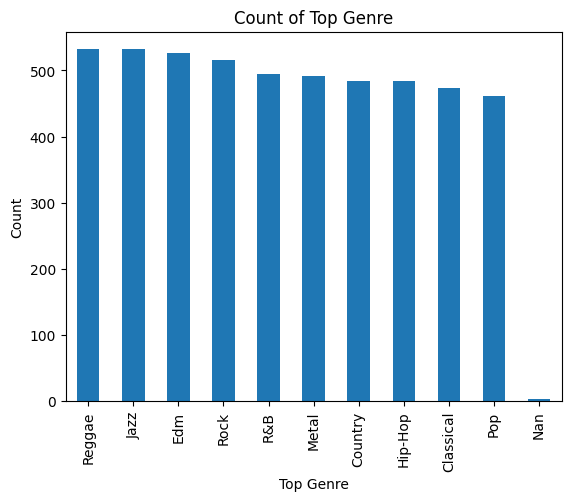

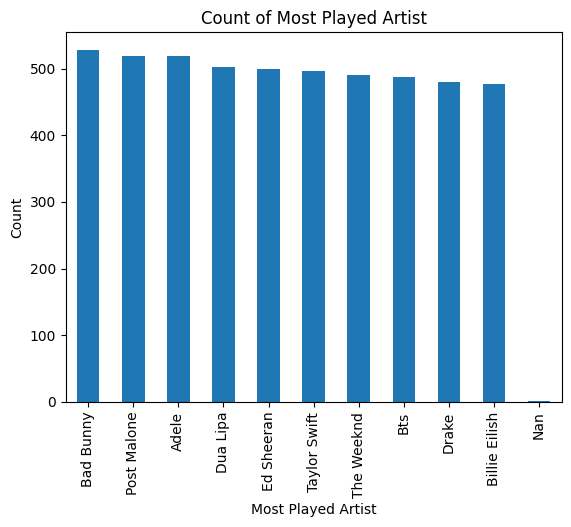

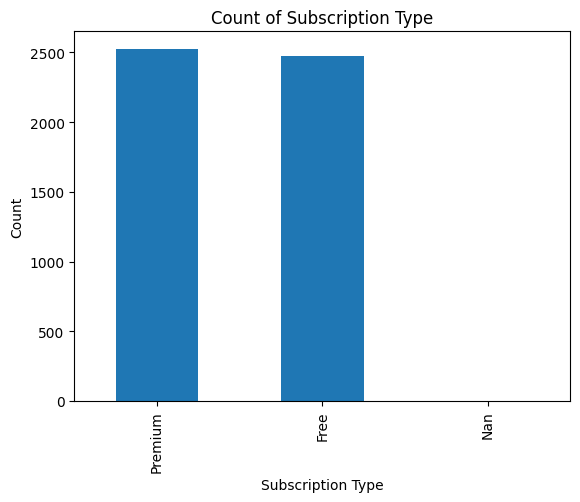

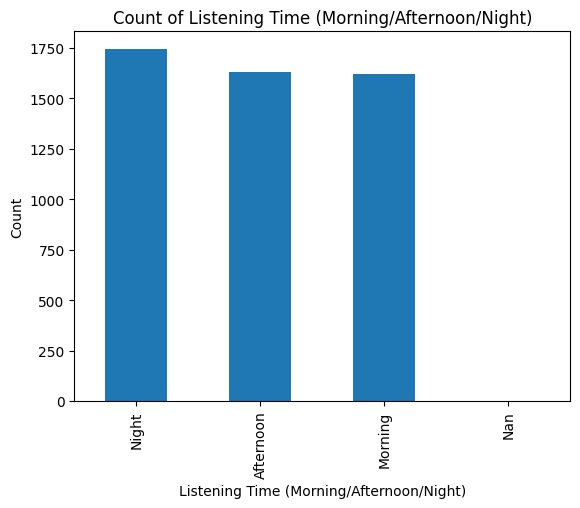

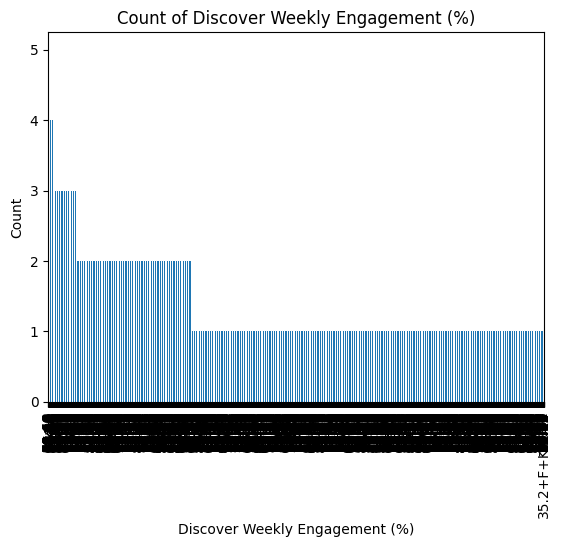

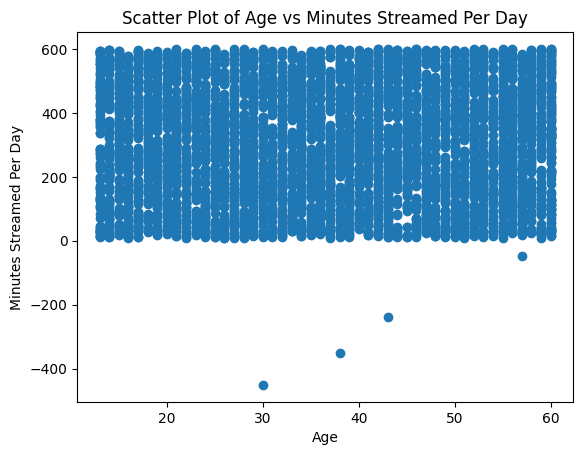

<Figure size 640x480 with 0 Axes>

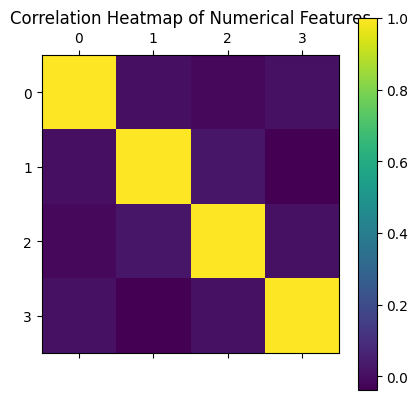

In [8]:
# 7. Data Visualization (Univariate & Bivariate)

import matplotlib.pyplot as plt

#UNIVARIATE ANALYSIS

# NUMERIC COLUMNS - HISTOGRAMS
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    plt.figure()
    plt.hist(df[col], bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# NUMERIC COLUMNS - BOXPLOTS
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

# CATEGORICAL COLUMNS - BAR CHARTS
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


#BIVARIATE ANALYSIS

# Scatter Plot
if len(numeric_cols) >= 2:
    x = numeric_cols[0]
    y = numeric_cols[1]
    plt.figure()
    plt.scatter(df[x], df[y])
    plt.title(f"Scatter Plot of {x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Correlation Heatmap
corr = df[numeric_cols].corr()

plt.figure()
plt.matshow(corr)
plt.title("Correlation Heatmap of Numerical Features")
plt.colorbar()
plt.show()


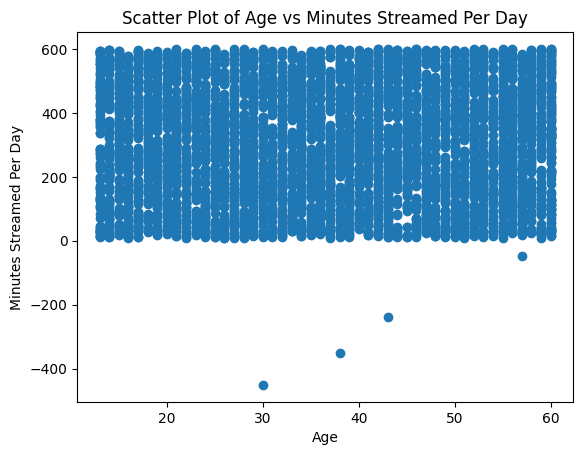

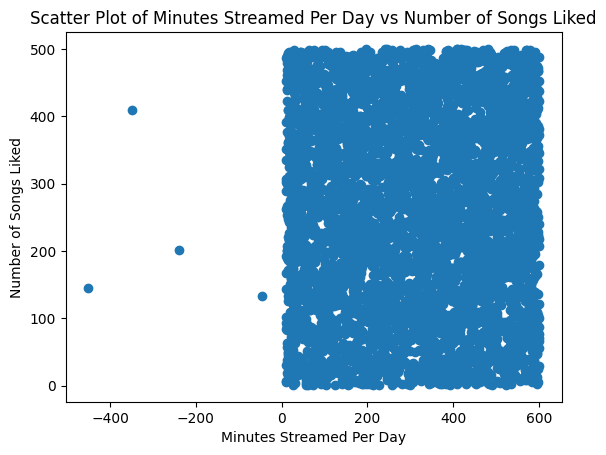

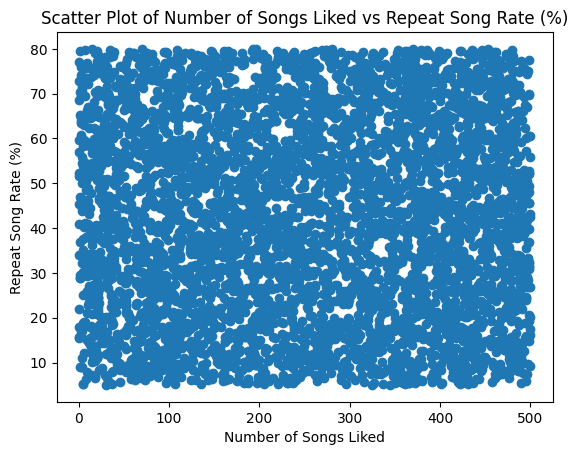

<Figure size 640x480 with 0 Axes>

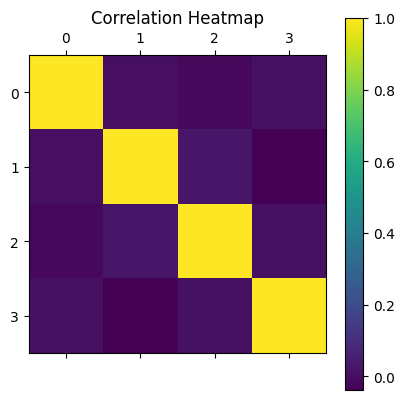

In [10]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64','float64']).columns

# Scatter plots for first 3 numerical columns if available
for i in range(min(3, len(numeric_cols)-1)):
    plt.figure()
    plt.scatter(df[numeric_cols[i]], df[numeric_cols[i+1]])
    plt.title(f"Scatter Plot of {numeric_cols[i]} vs {numeric_cols[i+1]}")
    plt.xlabel(numeric_cols[i])
    plt.ylabel(numeric_cols[i+1])
    plt.show()

#BAR CHART

if 'Favorite_Genre' in df.columns and 'Gender' in df.columns:
    df_group = df.groupby(['Favorite_Genre', 'Gender'])['Streaming_Hours_Per_Week'].mean().unstack()

    df_group.plot(kind='bar')
    plt.title("Avg Streaming Hours by Genre and Gender")
    plt.xlabel("Favorite Genre")
    plt.ylabel("Average Streaming Hours")
    plt.show()

#HEATMAP

numeric_cols = df.select_dtypes(include=['int64','float64']).columns
corr = df[numeric_cols].corr()

plt.figure()
plt.matshow(corr)
plt.title("Correlation Heatmap")
plt.colorbar()
plt.show()


In [11]:
# 8. Insights & Interpretation Summary (Auto-Generated)

import pandas as pd

print("\n=== KEY INSIGHTS FROM THE MUSIC LISTENER DATASET ===\n")

# 1. Most common category for each categorical column
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    most_common = df[col].value_counts().idxmax()
    count = df[col].value_counts().max()
    print(f"- Most common {col}: {most_common} ({count} listeners)")

print()

# 2. Summary stats for numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    print(f"- Average {col}: {df[col].mean():.2f}")
    print(f"  Minimum {col}: {df[col].min():.2f}")
    print(f"  Maximum {col}: {df[col].max():.2f}\n")

# 3. If the dataset contains streaming behavior columns:
if 'Streaming_Hours_Per_Week' in df.columns:
    avg_stream = df['Streaming_Hours_Per_Week'].mean()
    print(f"🎧 Listeners stream on average: {avg_stream:.1f} hours/week\n")

# 4. If favorite genre exists:
if 'Favorite_Genre' in df.columns:
    top_genre = df['Favorite_Genre'].value_counts().idxmax()
    print(f"🎶 The most popular music genre among listeners is: {top_genre}\n")

print("✅ Dataset is cleaned, encoded, scaled, and ready for further modeling or trend analysis.")



=== KEY INSIGHTS FROM THE MUSIC LISTENER DATASET ===

- Most common User_ID: U5999 (1 listeners)
- Most common Country: Australia (525 listeners)
- Most common Streaming Platform: Amazon Music (859 listeners)
- Most common Top Genre: Reggae (532 listeners)
- Most common Most Played Artist: Bad Bunny (528 listeners)
- Most common Subscription Type: Premium (2525 listeners)
- Most common Listening Time (Morning/Afternoon/Night): Night (1745 listeners)
- Most common Discover Weekly Engagement (%): 76.66 (5 listeners)

- Average Age: 36.66
  Minimum Age: 13.00
  Maximum Age: 60.00

- Average Minutes Streamed Per Day: 308.81
  Minimum Minutes Streamed Per Day: -451.00
  Maximum Minutes Streamed Per Day: 600.00

- Average Number of Songs Liked: 253.52
  Minimum Number of Songs Liked: 1.00
  Maximum Number of Songs Liked: 500.00

- Average Repeat Song Rate (%): 42.40
  Minimum Repeat Song Rate (%): 5.00
  Maximum Repeat Song Rate (%): 79.99

✅ Dataset is cleaned, encoded, scaled, and ready f